### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib

### Loading cleaned dataset

In [2]:
try:
    df = pd.read_csv('cleaned_heart_disease.csv')
    print("Cleaned dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'cleaned_heart_disease.csv' not found.")
    print("Please run the '01_data_preprocessing.ipynb' notebook first.")
    exit()

X = df.drop('target', axis=1)
y = df['target']

Cleaned dataset loaded successfully.


### Applying Principal Component Analysis (PCA) 

In [3]:
print("\nStep 1: Applying PCA...")
pca = PCA()
X_pca = pca.fit_transform(X)
print("PCA applied successfully.")


Step 1: Applying PCA...
PCA applied successfully.


### Plotting Cumulative Explained Variance


Step 2: Plotting explained variance...


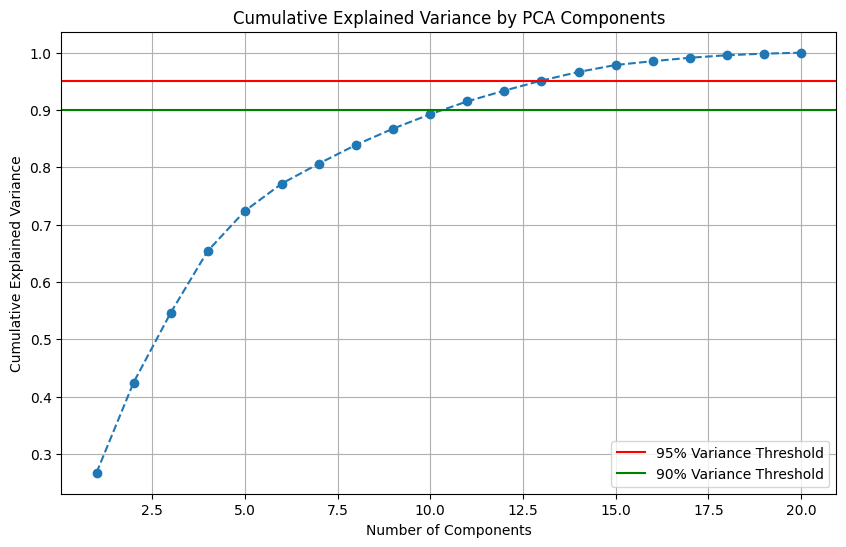


Number of components to retain 95% variance: 13


In [4]:
print("\nStep 2: Plotting explained variance...")
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.axhline(y=0.90, color='g', linestyle='-', label='90% Variance Threshold')
plt.legend()
plt.show()

n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"\nNumber of components to retain 95% variance: {n_components_95}")

### Visualizing first 2 principal components


Step 3: Visualizing first two principal components...


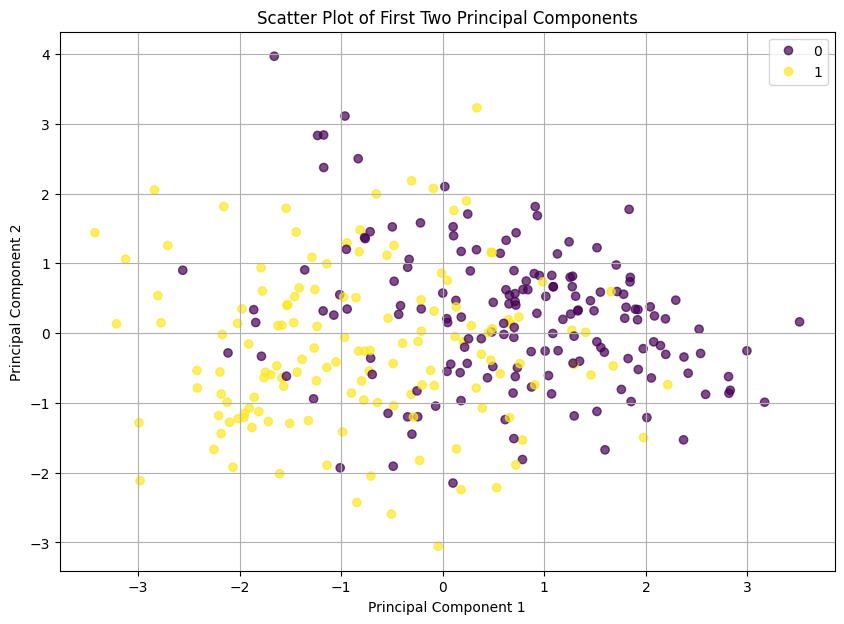


PCA-transformed dataset with 13 components saved to 'pca_transformed_dataset.csv'.

Final shape of PCA dataset: (303, 14)


In [5]:
print("\nStep 3: Visualizing first two principal components...")
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(y.unique()))
plt.grid(True)
plt.show()


pca_final = PCA(n_components=n_components_95)
X_pca_final = pca_final.fit_transform(X)

pca_cols = [f'PC_{i+1}' for i in range(n_components_95)]
df_pca = pd.DataFrame(X_pca_final, columns=pca_cols)
df_pca['target'] = y.values 


joblib.dump(pca_final, 'E:/VS Code Projects/Heart-Disease-Project/model/pca.pkl')

df_pca.to_csv('pca_transformed_dataset.csv', index=False)
print(f"\nPCA-transformed dataset with {n_components_95} components saved to 'pca_transformed_dataset.csv'.")
print("\nFinal shape of PCA dataset:", df_pca.shape)